<a href="https://colab.research.google.com/github/abuzarbagewadi/randomML/blob/main/KNN_Iris_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a classifier which uses KNN algorithm to classify Iris flowers into 
three types (classes).

In [1]:
#loading required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#url for the iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign column names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
df = pd.read_csv(url, names=names)
#printing top 5 rows of dataset
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
#Our target variable is "Class" and all other columns are features
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [4]:
#Splitting dataset into training part and testing part with the help of below mentioned library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) #20% is kept for testing

In [5]:
#feature scaling 
#It is compulsory to do feature scaling in KNN to get correct predictions.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
#Fitting the knn model with k = 1
#loading required libraries
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [7]:
#evaluating the model

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
#confusion matrix
print(confusion_matrix(y_test, y_pred))
#classification report
print(classification_report(y_test, y_pred))
#Accuracy of model
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

[[11  0  0]
 [ 0  7  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

Accuracy of our model is equal 96.67 %.


In [8]:
# creating list of K for KNN
#Using cross validation by importing below mentioned library
from sklearn.model_selection import cross_val_score
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

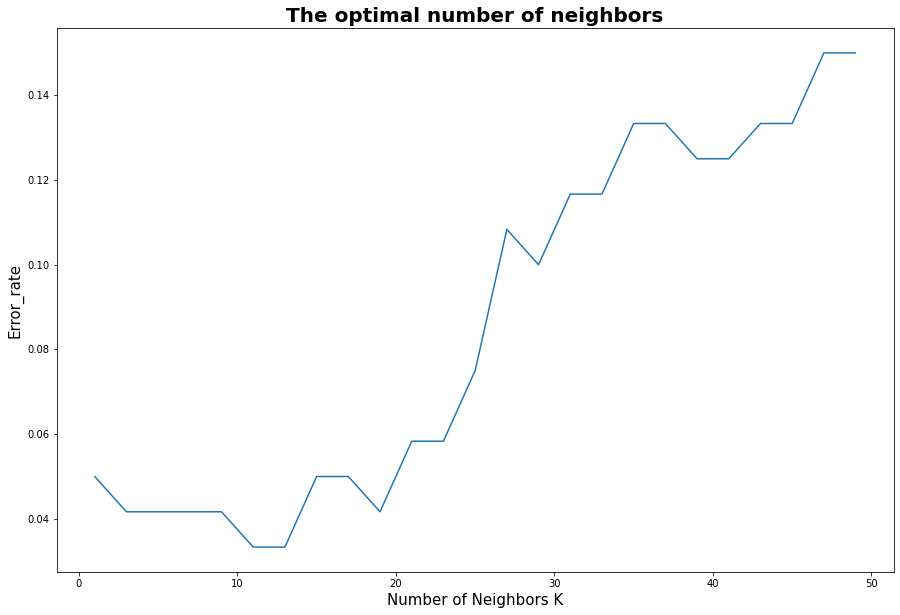

In [9]:
#Errors in cross validation can be calculated as = 1- accuracy 
Error_rate = [1 - x for x in cv_scores]
#plotting error rate vs values of K
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Error_rate', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, Error_rate)

plt.show()

In [10]:
#checking accuracy for our optimal value of k that is , k = 11
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')
#we found that accuracy of model is now increased.

[[11  0  0]
 [ 0  7  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

Accuracy of our model is equal 96.67 %.
